<a href="https://colab.research.google.com/github/ManishMallik/MachineLearning/blob/main/assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This Neural Network Model uses the Breast Cancer Wisconsin dataset from the UCI ML repositories. This consists of 9 attributes (we will not count Code # as that has no correlation with predicting the output), and 1 output, which can represent two classes: benign tumors (2) or malign tumors (4).

In [268]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# preprocess
def preprocess():
    # read in the data and set column names
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
    column_names = ["Code #", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                    "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                    "Normal Nuclei", "Mitoses", "Class"]
    data = pd.read_csv(url, names=column_names, delimiter=",")
    # some preprocessing
    data = data[data['Bare Nuclei'] != '?']
    data = data.dropna()
    data = data.drop_duplicates()

    # randomizing rows
    data = data.sample(frac=1)

    # features x
    X = data[["Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape",
                        "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin",
                        "Normal Nuclei", "Mitoses"]]
    # y output is class
    y = data['Class']

    # preprocessing standardization
    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    # X and y data
    X = np.array(X)
    y = np.array(y)

    # converting binary classes to 0 and 1
    y_clean = []
    for i in range(0, len(y)):
      if y[i] == 2:
        y_clean.append([0])
      elif y[i] == 4:
        y_clean.append([1])

    # splitting the train and test data
    rows = data.shape[0]
    ratio = 0.8
    index = int(rows * ratio)
    X_train = X[0:index]
    y_train = y_clean[0:index]
    X_test = X[index:]
    y_test = y_clean[index:]

    # set the train and test data
    X_train = np.array(X_train)
    y_train = np.array(y_train)
    X_test = np.array(X_test)
    y_test = np.array(y_test)
    return X_train, y_train, X_test, y_test

# Define activation functions
# sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# tanh function
def tanh(x):
    return np.tanh(x)

# ReLu function
def relu(x):
    return np.maximum(0, x)

# defining the derivatives for each:
def sigmoid_derivative(x):
    return x * (1 - x)

def tanh_derivative(x):
    return 1 - x**2

def relu_derivative(x):
    return (x <= 0) * 0 + (x > 0) * 1

# the neural network class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation_function='sigmoid'):

        # inputs initialized
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation_function = activation_function

        # We initialize the biases and the weights
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    # forward propagation with activation
    def forward(self, X):
        if self.activation_function == 'sigmoid':
            function = sigmoid
        elif self.activation_function == 'tanh':
            function = tanh
        elif self.activation_function == 'relu':
            function = relu

        # Forward pass multiplying weights and computing the output
        hidden_input = np.dot(X, self.weights_input_hidden) + self.bias_hidden
        hidden_output = function(hidden_input)
        output = np.dot(hidden_output, self.weights_hidden_output) + self.bias_output

        return hidden_output, output


    # batch gradient descent for backpropagation
    def batch_gradient_descent(self, X, y, learning_rate):
        hidden_output, output = self.forward(X)
        error = output - y

        # gradients for the weights and biases computed
        d_output = error / X.shape[0]
        d_weights_hidden_output = np.dot(hidden_output.T, d_output)
        d_bias_output = np.sum(d_output, axis=0, keepdims=True)

        d_hidden = np.dot(d_output, self.weights_hidden_output.T)

        # check the activation function and use its derivative
        if self.activation_function == 'sigmoid':
            d_hidden *= sigmoid_derivative(hidden_output)
        elif self.activation_function == 'tanh':
            d_hidden *= tanh_derivative(hidden_output)
        elif self.activation_function == 'relu':
            d_hidden *= relu_derivative(hidden_output)

        d_weights_input_hidden = np.dot(X.T, d_hidden)
        d_bias_hidden = np.sum(d_hidden, axis=0, keepdims=True)

        # the biases and weights updated
        self.weights_input_hidden -= learning_rate * d_weights_input_hidden
        self.bias_hidden -= learning_rate * d_bias_hidden
        self.weights_hidden_output -= learning_rate * d_weights_hidden_output
        self.bias_output -= learning_rate * d_bias_output



    # training
    def train(self, X_train, y_train, learning_rate=0.1, epochs=1000):
        for epoch in range(epochs):
            hidden_output, output = self.forward(X_train)

            # loss calculated
            loss = (y_train - output) ** 2

            # backpropagation using batch gradient descent
            self.batch_gradient_descent(X_train, y_train, learning_rate)


        # accuracy calculated and returned
        predictions = (output >= 0.5)
        accuracy = np.mean(predictions == y_train)

        return accuracy, predictions


    # testing
    def test(self, X_test, y_test):
        # forward pass
        _, output = self.forward(X_test)

        # accuracy calculated
        predictions = (output >= 0.5)
        accuracy = np.mean(predictions == y_test)

        return accuracy, predictions

if __name__ == '__main__':

    X_train, y_train, X_test, y_test = preprocess()

    # initializations for the neural network
    input_size = 9
    hidden_size = 5
    output_size = 1

    # each of the three activation functions
    activation_function = 'sigmoid'  # Neural Network with Sigmoid Function
    sigNN = NeuralNetwork(input_size, hidden_size, output_size, activation_function)
    activation_function = 'tanh'  # Neural Network with Tanh Function
    tanhNN = NeuralNetwork(input_size, hidden_size, output_size, activation_function)
    activation_function = 'relu'  # Neural Network with Relu Function
    reluNN = NeuralNetwork(input_size, hidden_size, output_size, activation_function)

    # sigmoid
    # train
    sig_train_accuracy, sig_train_pred = sigNN.train(X_train, y_train, learning_rate=0.1, epochs=1000)
    print(f"Train Accuracy (sigmoid): {sig_train_accuracy * 100}%")
    # test
    sig_test_accuracy, sig_test_pred = sigNN.test(X_test, y_test)
    print(f"Test Accuracy (sigmoid): {sig_test_accuracy * 100}%")


    # tanh
    # train
    tanh_train_accuracy, tanh_train_pred = tanhNN.train(X_train, y_train, learning_rate=0.1, epochs=1000)
    print(f"Train Accuracy (tanh): {tanh_train_accuracy * 100}%")
    # test
    tanh_test_accuracy, tanh_test_pred = tanhNN.test(X_test, y_test)
    print(f"Test Accuracy (tanh): {tanh_test_accuracy * 100}%")


    # relu
    # train
    relu_train_accuracy, relu_train_pred = reluNN.train(X_train, y_train, learning_rate=0.1, epochs=1000)
    print(f"Train Accuracy (relu): {relu_train_accuracy * 100}%")
    # test
    relu_test_accuracy, relu_test_pred = reluNN.test(X_test, y_test)
    print(f"Test Accuracy (relu): {relu_test_accuracy * 100}%")


Train Accuracy (sigmoid): 96.48148148148148%
Test Accuracy (sigmoid): 98.51851851851852%
Train Accuracy (tanh): 96.66666666666667%
Test Accuracy (tanh): 97.03703703703704%
Train Accuracy (relu): 95.55555555555556%
Test Accuracy (relu): 95.55555555555556%


Plot 1: Actual Training Output vs. Sigmoid Predicted Training Output

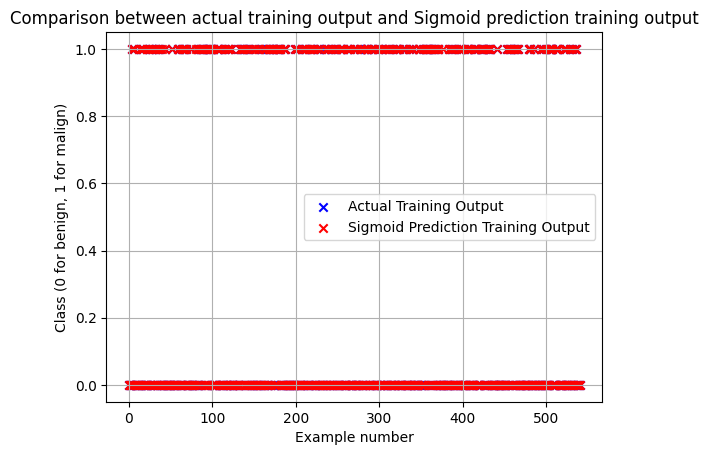

In [269]:
    # X values
    x = np.linspace(0, 540, 540)

    # Create a scatter plot to compare the two arrays
    plt.scatter(x, y_train, label='Actual Training Output', color='blue', marker='x')
    plt.scatter(x, sig_train_pred, label='Sigmoid Prediction Training Output', color='red', marker='x')


    # Add labels and a legend
    plt.xlabel('Example number')
    plt.ylabel('Class (0 for benign, 1 for malign)')
    plt.legend()

    # Add a title
    plt.title('Comparison between actual training output and Sigmoid prediction training output')

    # Display the plot
    plt.grid()
    plt.show()

Plot 2: Actual Training Output vs. Tanh Predicted Training Output

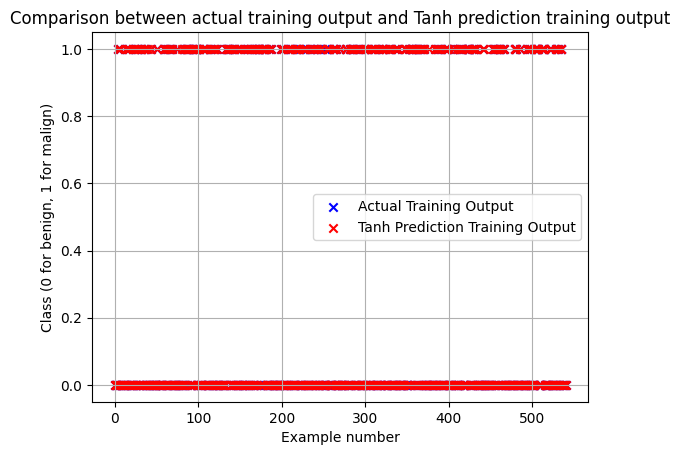

In [270]:
    # X values
    x = np.linspace(0, 540, 540)

    # Create a scatter plot to compare the two arrays
    plt.scatter(x, y_train, label='Actual Training Output', color='blue', marker='x')
    plt.scatter(x, tanh_train_pred, label='Tanh Prediction Training Output', color='red', marker='x')


    # Add labels and a legend
    plt.xlabel('Example number')
    plt.ylabel('Class (0 for benign, 1 for malign)')
    plt.legend()

    # Add a title
    plt.title('Comparison between actual training output and Tanh prediction training output')

    # Display the plot
    plt.grid()
    plt.show()

Plot 3: Actual Training Output vs. Relu Predicted Training Output

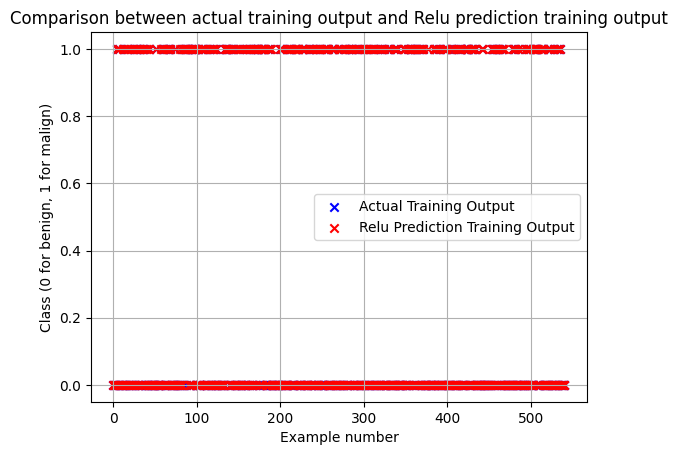

In [271]:
    # X values
    x = np.linspace(0, 540, 540)

    # Create a scatter plot to compare the two arrays
    plt.scatter(x, y_train, label='Actual Training Output', color='blue', marker='x')
    plt.scatter(x, relu_train_pred, label='Relu Prediction Training Output', color='red', marker='x')


    # Add labels and a legend
    plt.xlabel('Example number')
    plt.ylabel('Class (0 for benign, 1 for malign)')
    plt.legend()

    # Add a title
    plt.title('Comparison between actual training output and Relu prediction training output')

    # Display the plot
    plt.grid()
    plt.show()

Plot 4: Actual Testing Output vs. Sigmoid Predicted Testing Output

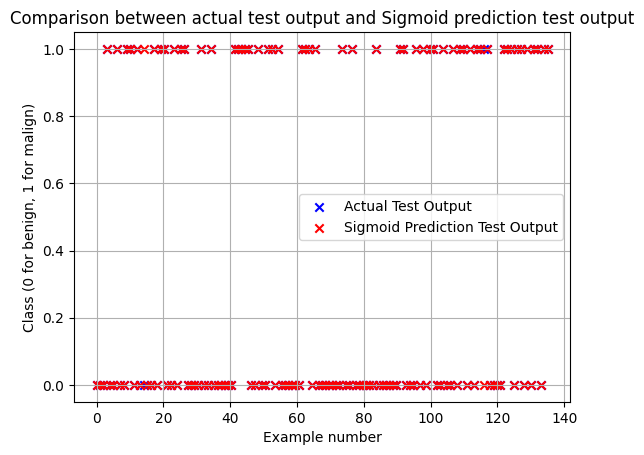

In [272]:
    # X values
    x = np.linspace(0, 135, 135)

    # Create a scatter plot to compare the two arrays
    plt.scatter(x, y_test, label='Actual Test Output', color='blue', marker='x')
    plt.scatter(x, sig_test_pred, label='Sigmoid Prediction Test Output', color='red', marker='x')

    # Add labels and a legend
    plt.xlabel('Example number')
    plt.ylabel('Class (0 for benign, 1 for malign)')
    plt.legend()

    # Add a title
    plt.title('Comparison between actual test output and Sigmoid prediction test output')

    # Display the plot
    plt.grid()
    plt.show()

Plot 5: Actual Testing Output vs. Relu Predicted Testing Output

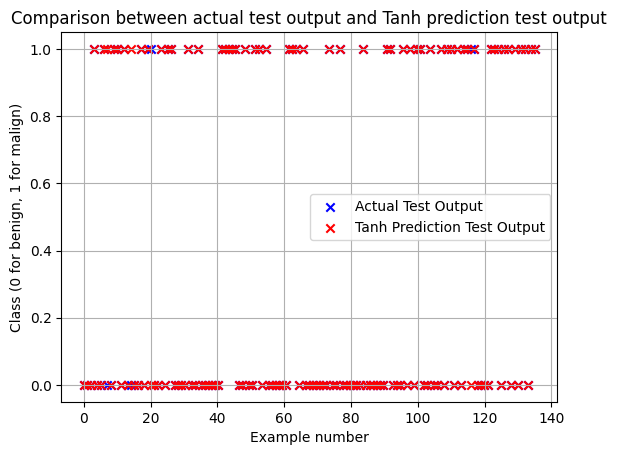

In [273]:
    # X values
    x = np.linspace(0, 135, 135)

    # Create a scatter plot to compare the two arrays
    plt.scatter(x, y_test, label='Actual Test Output', color='blue', marker='x')
    plt.scatter(x, tanh_test_pred, label='Tanh Prediction Test Output', color='red', marker='x')

    # Add labels and a legend
    plt.xlabel('Example number')
    plt.ylabel('Class (0 for benign, 1 for malign)')
    plt.legend()

    # Add a title
    plt.title('Comparison between actual test output and Tanh prediction test output')

    # Display the plot
    plt.grid()
    plt.show()

Plot 6: Actual Testing Output vs. Relu Predicted Testing Output

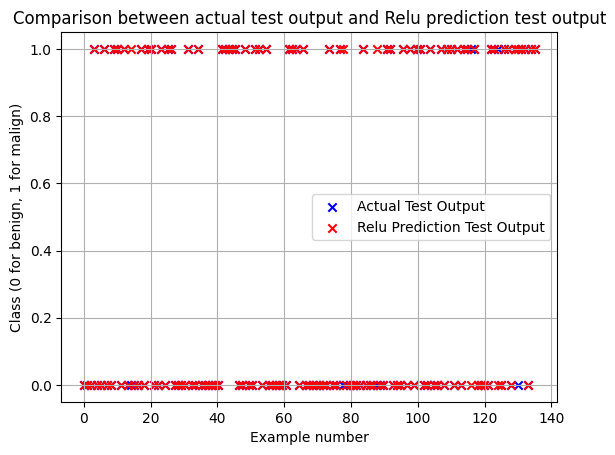

In [274]:
    # X values
    x = np.linspace(0, 135, 135)

    # Create a scatter plot to compare the two arrays
    plt.scatter(x, y_test, label='Actual Test Output', color='blue', marker='x')
    plt.scatter(x, relu_test_pred, label='Relu Prediction Test Output', color='red', marker='x')

    # Add labels and a legend
    plt.xlabel('Example number')
    plt.ylabel('Class (0 for benign, 1 for malign)')
    plt.legend()

    # Add a title
    plt.title('Comparison between actual test output and Relu prediction test output')

    # Display the plot
    plt.grid()
    plt.show()